In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df = pd.read_csv("telecom_churn_data.csv")

# filter warnings
import os
import warnings
warnings.filterwarnings('ignore')

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [3]:
df.circle_id.unique()

df.drop(['circle_id'],axis=1,inplace=True)

In [4]:
recharge_cols = df.columns[df.columns.str.contains(pat = 'rech')] 
recharge_cols

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], dtype='object')

In [5]:
# Check missing values
100*df.loc[:,recharge_cols].isnull().sum()/len(df)


total_rech_num_6             0.000000
total_rech_num_7             0.000000
total_rech_num_8             0.000000
total_rech_num_9             0.000000
total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
date_of_last_rech_6          1.607016
date_of_last_rech_7          1.767018
date_of_last_rech_8          3.622036
date_of_last_rech_9          4.760048
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_dat

In [6]:
#Replacing Nan columns

df.loc[:,['total_rech_data_6','total_rech_data_7','total_rech_data_8']]= df.loc[:,['total_rech_data_6','total_rech_data_7','total_rech_data_8']].replace(np.NaN,0)

df.loc[:,['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']]= df.loc[:,['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']].replace(np.NaN,0)


In [7]:
# Checking Nan sum

print(df.total_rech_data_6.isnull().sum())
print(df.total_rech_data_7.isnull().sum())
print(df.total_rech_data_8.isnull().sum())

print(df.av_rech_amt_data_6.isnull().sum())
print(df.av_rech_amt_data_7.isnull().sum())
print(df.av_rech_amt_data_8.isnull().sum())

0
0
0
0
0
0


In [8]:
#New column for average recharge amount
df['total_rech_amt_data_6'] = df.av_rech_amt_data_6*df.total_rech_data_6
df['total_rech_amt_data_7'] = df.av_rech_amt_data_7*df.total_rech_data_7
df['total_rech_amt_data_8'] = df.av_rech_amt_data_8*df.total_rech_data_8

##Drop these columns as we've acuumulated into total column
df.drop(['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','total_rech_data_6',
         'total_rech_data_7','total_rech_data_8'],axis=1,inplace=True)

In [9]:
##Derive new columns to combine 6 and 7 months :: good phase
##This column will be used to ilter high value customers

df['total_goodphase_avg_rech_amnt'] = (df.total_rech_amt_6 +df.total_rech_amt_data_6 + df.total_rech_amt_7 + df.total_rech_amt_data_7)/4

In [10]:
#high value customers Filter using total_goodphase_avg_rech_amnt
seventy_quantile_value = df.total_goodphase_avg_rech_amnt.quantile(0.7)

df = df[df.total_goodphase_avg_rech_amnt >= seventy_quantile_value]
df.shape

(30001, 223)

In [11]:
#Find out churned customers based on the columns provided
list_churned = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']
100*df.loc[:,list_churned].isnull().sum()/len(df)

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [12]:
# define churn flag
churned = (df.total_ic_mou_9 == 0) & (df.total_og_mou_9 == 0) & (df.vol_2g_mb_9 ==0)& (df.vol_3g_mb_9 ==0)

In [13]:
##New churn Column

df['churn']= 0
df.loc[churned,'churn']=1

In [14]:
#df.head()

print(df.churn.sum())
print(df.churn.sum()/len(df))

## ~ 8% of high value customers are churned

2441
0.08136395453484883


In [15]:
#We've got the churned customer. No need of _9 columns now

month_9_columns =  df.columns[df.columns.str.contains('_9')]
df.drop(month_9_columns,axis=1,inplace=True)

<b>EDA</b>

In [16]:
##EDA -----------------------------------------------

##Util Functions

#BoxPlots for a feature for Churned and non-churned
def meanAndMedian(feature_start):
    
    plt.rcParams["figure.figsize"] = [20,5]
    fig = plt.figure()
    
    months = [6,7,8]
    cols = {c: feature_start + "_" + str(c) for c in [6,7,8]}
    
    ##Print Mean and median of the feature for churned and non-churned
    ##Mean and median values of recharge amounts will vary drastically for churned and non-churned
    
    print("Column :::" + feature_start)
    print("")
    print("Not Churned-----------")
    for month in months:
        print("Mean for Month "+ str(month) + " ::: " + str(df[df["churn"] == 0][cols[month]].mean()))
        print("Median for Month"+ str(month) + " ::: " + str(df[df["churn"] == 0][cols[month]].median()))
        print("")
        
    print("")
    print("Churned---------------")
    for month in months:
        print("Mean for "+ str(month) +" ::: " + str(df[df["churn"] == 1][cols[month]].mean()))
        print("Median for "+ str(month) +" ::: " + str(df[df["churn"] == 1][cols[month]].median()))
        print("")
    
    ##BoxPlots
    f,axes = plt.subplots(nrows=1, ncols=3)
    sns.boxplot(data=df, y=feature_start + "_6", x="churn",hue="churn", linewidth=2, showfliers=False, ax=axes[0])

    sns.boxplot(data=df, y=feature_start + "_7",  x="churn",hue="churn", linewidth=2, showfliers=False, ax=axes[1])

    sns.boxplot(data=df, y=feature_start + "_8",  x="churn",hue="churn", linewidth=2, showfliers=False, ax=axes[2])

##Combine 6 and 7 month column into goodphase__
def combineGoodPhaseColumn(colName):
    month_6 = colName + "_6"
    month_7 = colName + "_7"
    df['goodphase_'+colName] = (df[month_6]+df[month_7])/2

In [17]:
# no need of total_goodphase_avg_rech_amnt as we've filtered high value customers
df.drop('total_goodphase_avg_rech_amnt',axis=1,inplace=True)

<b>Recharge Related Columns</b>

Column :::total_rech_amt_data

Not Churned-----------
Mean for Month 6 ::: 460.0770714804063
Median for Month6 ::: 98.0

Mean for Month 7 ::: 545.0567891872279
Median for Month7 ::: 149.0

Mean for Month 8 ::: 496.8857405660377
Median for Month8 ::: 91.0


Churned---------------
Mean for 6 ::: 407.2292830807046
Median for 6 ::: 0.0

Mean for 7 ::: 338.2937607537894
Median for 7 ::: 0.0

Mean for 8 ::: 83.52337566571077
Median for 8 ::: 0.0



<Figure size 1440x360 with 0 Axes>

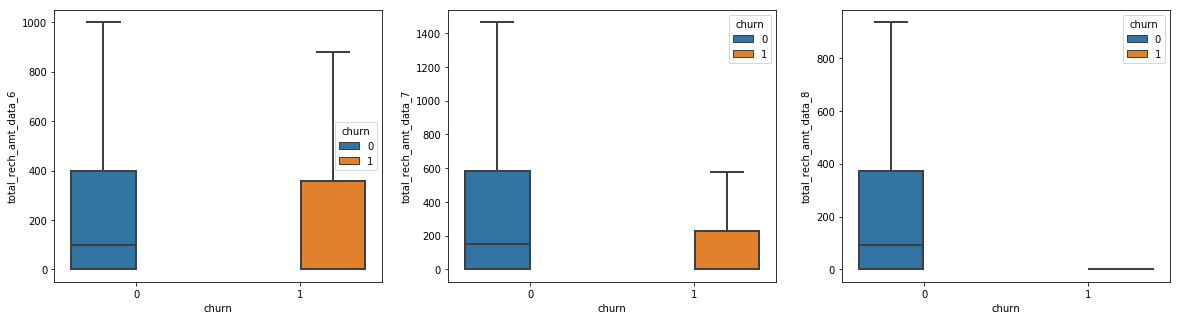

In [18]:
##Compute Mean and median for rechared related columns for Churned and Non-churned case

meanAndMedian('total_rech_amt_data')

##We can see substancial decline in mean and median for total recharge amount of data of churned
##users as we go from 6 to 8 months

Column :::total_rech_amt

Not Churned-----------
Mean for Month 6 ::: 649.574709724238
Median for Month6 ::: 558.0

Mean for Month 7 ::: 663.5278301886792
Median for Month7 ::: 565.0

Mean for Month 8 ::: 613.7010885341074
Median for Month8 ::: 510.0


Churned---------------
Mean for 6 ::: 786.7070872593199
Median for 6 ::: 660.0

Mean for 7 ::: 626.2900450634986
Median for 7 ::: 526.0

Mean for 8 ::: 253.15280622695616
Median for 8 ::: 45.0



<Figure size 1440x360 with 0 Axes>

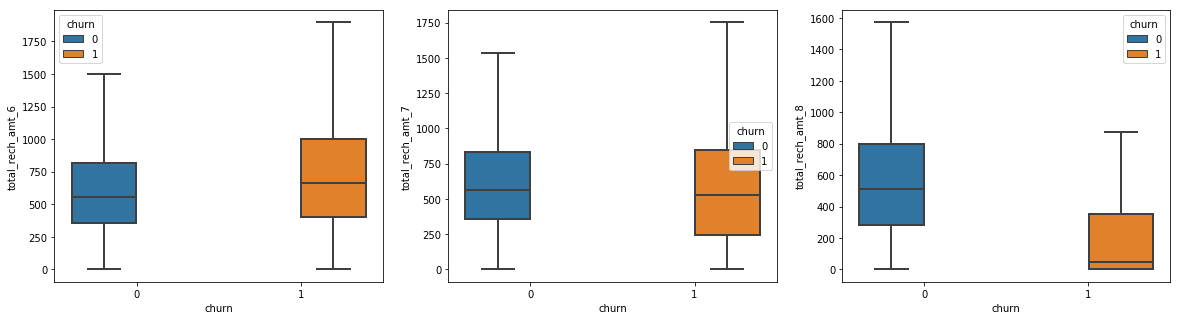

In [19]:
##total_rech_amt

meanAndMedian("total_rech_amt")

##We can see substancial decline in mean and median for total recharge amount of churned
##users as we go from 6 to 8 months

Column :::total_rech_num

Not Churned-----------
Mean for Month 6 ::: 11.669738751814224
Median for Month6 ::: 9.0

Mean for Month 7 ::: 11.747496371552975
Median for Month7 ::: 9.0

Mean for Month 8 ::: 10.392126269956458
Median for Month8 ::: 8.0


Churned---------------
Mean for 6 ::: 13.897582957804179
Median for 6 ::: 11.0

Mean for 7 ::: 11.395329782875871
Median for 7 ::: 9.0

Mean for 8 ::: 5.239246210569439
Median for 8 ::: 3.0



<Figure size 1440x360 with 0 Axes>

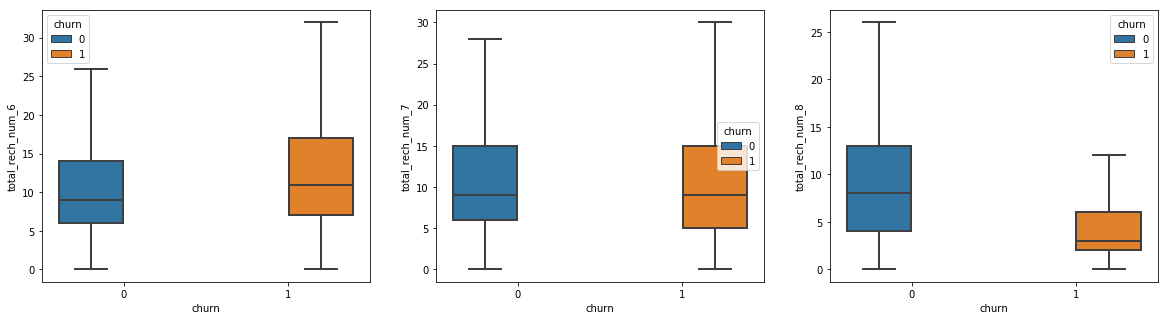

In [20]:
##total_rech_num
meanAndMedian("total_rech_num")

##We can see substantial decline in mean and median for total number of recharges of churned
##users as we go from 6 to 8 months

In [21]:
##Combine good phase columns into one column

recharge_cols_goodphase = ['last_day_rch_amt','total_rech_num','total_rech_amt','total_rech_amt_data','max_rech_amt']

for oth in recharge_cols_goodphase:
    ##combine
    combineGoodPhaseColumn(oth)
    ##drop from df
    df.drop(oth+"_6",axis=1,inplace=True)
    df.drop(oth+"_7",axis=1,inplace=True)


In [22]:
##compute missing values for data related columns

100*df.loc[:,["max_rech_data_6"]].isnull().sum()/len(df)

max_rech_data_6    44.148528
dtype: float64

In [23]:
df.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] = df.loc[:,['max_rech_data_6',
                                                                        'max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

df['goodphase_max_rech_data'] = (df.max_rech_data_6 + df.max_rech_data_7)/2
df.drop(['max_rech_data_6','max_rech_data_7'],axis=1,inplace=True)

<b>Minutes of Usage related variables</b>

In [24]:
#MOU related columns
mou_cols = df.columns[df.columns.str.contains('mou')]
print(mou_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t

In [25]:
df[mou_cols].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8
count,29777.0,29777.0,29777.0,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.0,29464.0,28827.0,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.0,29464.0,28827.0,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.00000,28827.000000
mean,0.0,0.0,0.0,265.618262,272.700470,243.646938,380.608111,384.994337,348.723294,16.408431,12.872921,13.009645,27.063178,20.519370,20.674656,86.047905,87.235755,81.256858,166.263652,165.980922,157.937216,6.461494,6.540759,6.126112,1.604247,1.924320,1.777295,258.781428,259.765948,245.328371,168.954534,177.409496,154.486547,182.753296,191.345743,163.758261,1.836917,1.859332,1.649273,0.0,0.0,0.0,353.548540,370.618355,319.897555,2.211703,2.144122,2.028343,5.925921,7.238206,6.824251,609.866251,628.366047,551.678812,66.664313,67.851431,65.169653,153.195349,154.388675,152.188163,15.561152,16.327824,14.989754,235.430623,238.577812,232.357291,15.170365,15.702570,14.480350,29.735390,31.384277,29.059765,2.745734,2.849447,2.666308,0.0,0.0,0.0,47.655140,49.940010,46.209942,289.950496,296.756987,279.922931,0.062165,0.020125,0.027649,10.984229,12.09224,11.446169
std,0.0,0.0,0.0,462.493645,482.972367,465.200856,484.257474,500.807874,486.918550,76.973057,76.454034,75.575865,117.218920,96.933381,106.751862,230.609510,242.427257,231.399901,251.423301,242.754684,236.315181,22.310305,22.125961,19.858510,6.357757,9.238487,7.345047,380.226723,377.227177,367.505268,406.914141,424.347895,404.426554,412.056950,436.816512,416.088724,12.087212,13.095663,11.147419,0.0,0.0,0.0,612.382663,643.696568,618.022200,46.273483,45.957517,45.611669,17.711012,21.964629,20.677329,690.873430,717.219171,700.478180,165.002284,168.678411,161.602601,220.251819,219.252313,217.137562,46.125606,49.563887,44.078609,316.13

In [26]:
100*df.loc[:,mou_cols].isnull().sum()/len(df.loc[:,mou_cols])

loc_og_t2o_mou      0.746642
std_og_t2o_mou      0.746642
loc_ic_t2o_mou      0.746642
onnet_mou_6         1.816606
onnet_mou_7         1.789940
onnet_mou_8         3.913203
offnet_mou_6        1.816606
offnet_mou_7        1.789940
offnet_mou_8        3.913203
roam_ic_mou_6       1.816606
roam_ic_mou_7       1.789940
roam_ic_mou_8       3.913203
roam_og_mou_6       1.816606
roam_og_mou_7       1.789940
roam_og_mou_8       3.913203
loc_og_t2t_mou_6    1.816606
loc_og_t2t_mou_7    1.789940
loc_og_t2t_mou_8    3.913203
loc_og_t2m_mou_6    1.816606
loc_og_t2m_mou_7    1.789940
loc_og_t2m_mou_8    3.913203
loc_og_t2f_mou_6    1.816606
loc_og_t2f_mou_7    1.789940
loc_og_t2f_mou_8    3.913203
loc_og_t2c_mou_6    1.816606
loc_og_t2c_mou_7    1.789940
loc_og_t2c_mou_8    3.913203
loc_og_mou_6        1.816606
loc_og_mou_7        1.789940
loc_og_mou_8        3.913203
std_og_t2t_mou_6    1.816606
std_og_t2t_mou_7    1.789940
std_og_t2t_mou_8    3.913203
std_og_t2m_mou_6    1.816606
std_og_t2m_mou

In [27]:
## We see for these columns from describe function, no values are present ##Droping these columns

no_values = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
            'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

df.drop(list(no_values),axis=1,inplace=True)


In [28]:
## we can replace Nan values of minutes of usage with 0 as only max of 3.9% columns have Nan
mou_cols = df.columns[df.columns.str.contains('mou')]

df[mou_cols] = df[mou_cols].replace(np.NaN,0)

In [29]:
## Combine GoodPhase variables into one for outgoing and incoming cols

##Base column Names
og_cols = ['spl_og_mou','isd_og_mou','roam_og_mou','std_og_t2m_mou','std_og_t2t_mou',
           'std_og_t2f_mou','loc_og_t2m_mou','loc_og_t2t_mou','loc_og_t2f_mou','loc_og_t2c_mou']

ic_cols = ['spl_ic_mou','isd_ic_mou','roam_ic_mou','std_ic_t2m_mou','std_ic_t2t_mou',
           'std_ic_t2f_mou','loc_ic_t2m_mou','loc_ic_t2t_mou','loc_ic_t2f_mou']


for ogc in og_cols:
    ##combine
    combineGoodPhaseColumn(ogc)
    ##drop from df
    df.drop(ogc+"_6",axis=1,inplace=True)
    df.drop(ogc+"_7",axis=1,inplace=True)
    
for icc in ic_cols:
    ##combine
    combineGoodPhaseColumn(icc)
    ##drop from df
    df.drop(icc+"_6",axis=1,inplace=True)
    df.drop(icc+"_7",axis=1,inplace=True)
    
    

Onnet

Column :::onnet_mou

Not Churned-----------
Mean for Month 6 ::: 251.20393759071854
Median for Month6 ::: 83.295

Mean for Month 7 ::: 265.6414321480468
Median for Month7 ::: 83.78

Mean for Month 8 ::: 244.81943251089035
Median for Month8 ::: 73.58


Churned---------------
Mean for 6 ::: 369.05817287996825
Median for 6 ::: 113.01

Mean for 7 ::: 292.4083531339628
Median for 7 ::: 71.43

Mean for 8 ::: 113.22684555510014
Median for 8 ::: 2.36



<Figure size 1440x360 with 0 Axes>

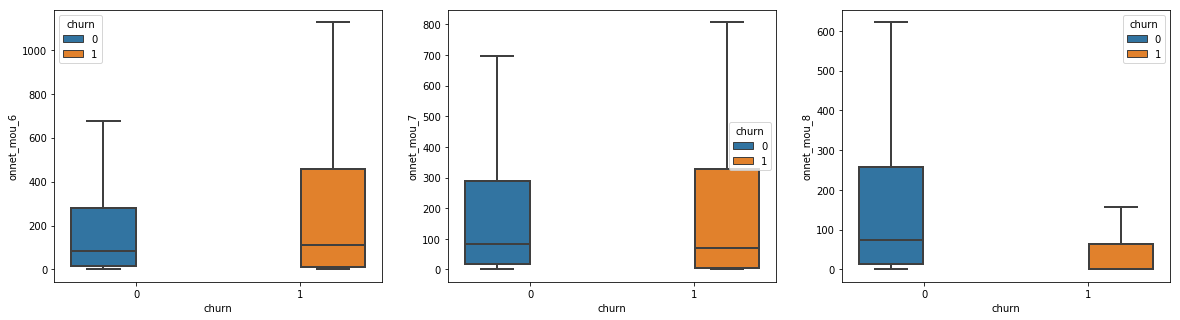

In [30]:
meanAndMedian('onnet_mou')

## We see substantial decrease in On network-Minutes of usage for churned users in 8th month

Offnet

Column :::offnet_mou

Not Churned-----------
Mean for Month 6 ::: 365.0462031930444
Median for Month6 ::: 221.44

Mean for Month 7 ::: 377.8097405660528
Median for Month7 ::: 224.825

Mean for Month 8 ::: 352.51020355588986
Median for Month8 ::: 202.79


Churned---------------
Mean for 6 ::: 471.3310733306014
Median for 6 ::: 239.14

Mean for 7 ::: 381.4161040557161
Median for 7 ::: 162.19

Mean for 8 ::: 138.2487505120854
Median for 8 ::: 10.28



<Figure size 1440x360 with 0 Axes>

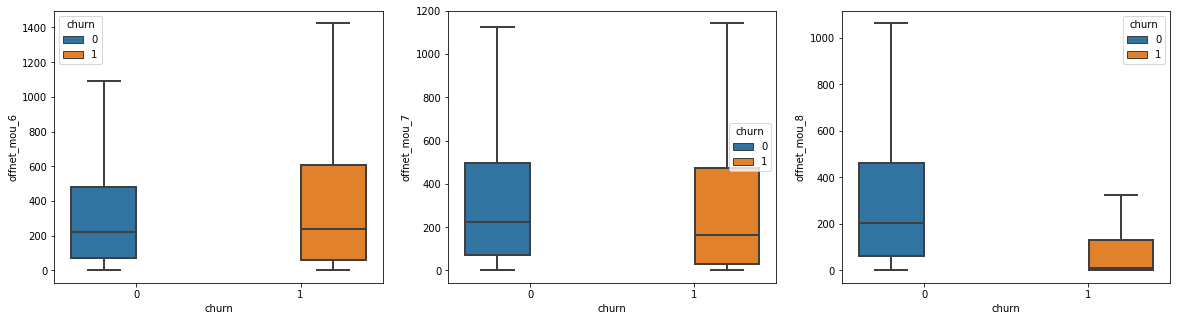

In [31]:
meanAndMedian('offnet_mou')

## We see substantial decrease in Off the network-Minutes of usage for churned users in 8th month

std_og_mou_6 is the sum of different std_og columns


loc_og_mou_6 is the sum of different loc_og columns

In [32]:
og_mou_cols = df.columns[df.columns.str.contains('std_og_mou|loc_og_mou',regex=True)]

print(og_mou_cols)

df.drop(og_mou_cols,axis=1,inplace=True)

Index(['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8'], dtype='object')


others og and ic

In [33]:
others_ogic_cols = df.columns[df.columns.str.contains('_others')]

df[others_ogic_cols].describe()

,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8
count,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000
mean,0.673323,0.043687,0.059953,1.174790,1.527682,1.274322
std,4.144797,2.701071,3.381939,14.113843,16.141140,13.038515
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.060000,0.000000,0.060000
max,609.810000,370.130000,394.930000,1344.140000,1495.940000,1209.860000


In [34]:
## Combine other cols for good phase
others_cols = ['og_others','ic_others']

for oth in others_cols:
    ##combine
    combineGoodPhaseColumn(oth)
    ##drop from df
    df.drop(oth+"_6",axis=1,inplace=True)
    df.drop(oth+"_7",axis=1,inplace=True)

<b>Last Date of recharge and date Columns</b>


In [35]:
# Date columns
date_columns = df.columns[df.columns.str.contains('date')]

# convert to datetime for extracting date
for date_col in list(date_columns):
    df[date_col]= pd.to_datetime(df[date_col])

In [36]:
date_columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], dtype='object')

In [37]:
#check range of these column values
df[date_columns].describe()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
count,30001,29974,29836,29928,29903,29418,16756,17057,15953
unique,1,1,1,30,31,31,30,31,31
top,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00
freq,30001,29974,29836,8376,7610,6200,1553,1460,1304
first,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00
last,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00


In [38]:
#Drop Columns last_date_of_month_6	last_date_of_month_7	last_date_of_month_8 as 1 unique value
df.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1,inplace=True)

Last Day of recharge anaylsis

In [39]:
## create Derived column for last Day of recharge
df['last_rchg_day_6'] =  df.date_of_last_rech_6.dt.day
df['last_rchg_day_7'] =  df.date_of_last_rech_7.dt.day
df['last_rchg_day_8'] =  df.date_of_last_rech_8.dt.day

## Dropping as date is extracted
df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)

Column :::last_rchg_day

Not Churned-----------
Mean for Month 6 ::: 26.45607911576498
Median for Month6 ::: 28.0

Mean for Month 7 ::: 27.438233690714156
Median for Month7 ::: 29.0

Mean for Month 8 ::: 26.95011719894521
Median for Month8 ::: 29.0


Churned---------------
Mean for 6 ::: 26.537953795379536
Median for 6 ::: 28.0

Mean for 7 ::: 25.326633165829147
Median for 7 ::: 27.0

Mean for 8 ::: 23.2961210974456
Median for 8 ::: 26.0



<Figure size 1440x360 with 0 Axes>

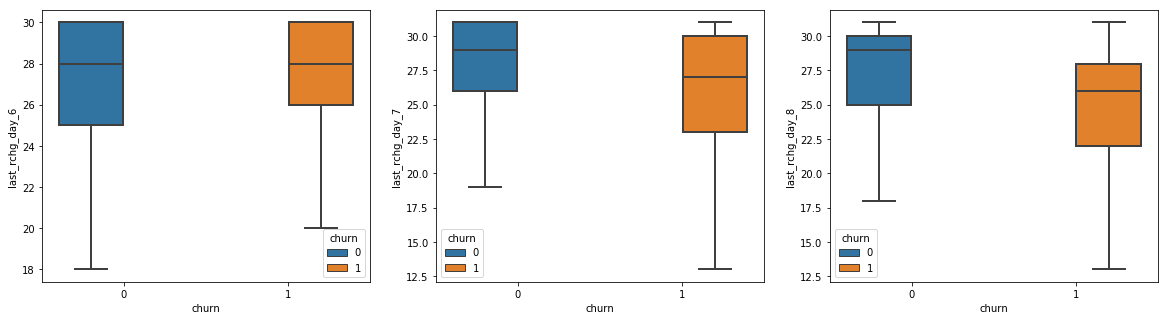

In [40]:
meanAndMedian('last_rchg_day')

# We can see that last recharge day for churned case decreased in last month

Last day of data pack recharge analysis

In [41]:
## Do same for data pack
df['last_rchg_day_data_6'] =  df.date_of_last_rech_data_6.dt.day
df['last_rchg_day_data_7'] =  df.date_of_last_rech_data_7.dt.day
df['last_rchg_day_data_8'] =  df.date_of_last_rech_data_8.dt.day

## Dropping as date is extracted
df.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)

Column :::last_rchg_day_data

Not Churned-----------
Mean for Month 6 ::: 20.16974972796518
Median for Month6 ::: 22.0

Mean for Month 7 ::: 21.18817538194013
Median for Month7 ::: 24.0

Mean for Month 8 ::: 20.467342196979477
Median for Month8 ::: 23.0


Churned---------------
Mean for 6 ::: 20.197705207413946
Median for 6 ::: 22.0

Mean for 7 ::: 18.912041884816755
Median for 7 ::: 20.0

Mean for 8 ::: 15.337690631808279
Median for 8 ::: 15.0



<Figure size 1440x360 with 0 Axes>

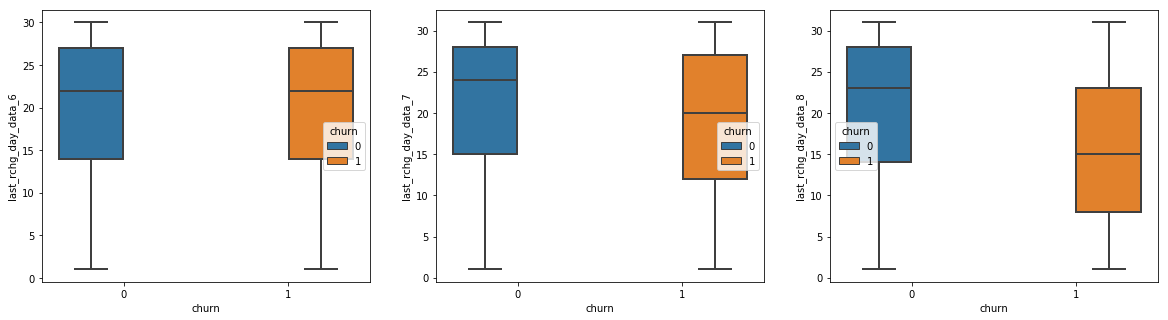

In [42]:
meanAndMedian('last_rchg_day_data')

# We can see that last recharge day of data pack for churned case decreased in last month

<b>2G and 3G variables</b>

In [43]:
g23_cols = df.columns[df.columns.str.contains('2g|3g',regex=True)]

In [44]:
df[g23_cols].isnull().sum()/len(df[g23_cols])

count_rech_2g_6    0.441485
count_rech_2g_7    0.431452
count_rech_2g_8    0.468251
count_rech_3g_6    0.441485
count_rech_3g_7    0.431452
count_rech_3g_8    0.468251
vol_2g_mb_6        0.000000
vol_2g_mb_7        0.000000
vol_2g_mb_8        0.000000
vol_3g_mb_6        0.000000
vol_3g_mb_7        0.000000
vol_3g_mb_8        0.000000
arpu_3g_6          0.441485
arpu_3g_7          0.431452
arpu_3g_8          0.468251
arpu_2g_6          0.441485
arpu_2g_7          0.431452
arpu_2g_8          0.468251
monthly_2g_6       0.000000
monthly_2g_7       0.000000
monthly_2g_8       0.000000
sachet_2g_6        0.000000
sachet_2g_7        0.000000
sachet_2g_8        0.000000
monthly_3g_6       0.000000
monthly_3g_7       0.000000
monthly_3g_8       0.000000
sachet_3g_6        0.000000
sachet_3g_7        0.000000
sachet_3g_8        0.000000
aug_vbc_3g         0.000000
jul_vbc_3g         0.000000
jun_vbc_3g         0.000000
sep_vbc_3g         0.000000
dtype: float64

In [45]:
## aug_vbc_3g :: Rename columns
df.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'}, inplace=True)
df.drop(['sep_vbc_3g'],axis=1,inplace=True)

In [46]:
# count_rech and arpu_have more than 40% data mmissing,
# We have volumne data and sachet data, so drop columns with more than 40% data missing

count_23g_cols = g23_cols[g23_cols.str.contains('^count_',regex=True)]
arpu_23g_cols = g23_cols[g23_cols.str.contains('^arpu',regex=True)]

df.drop(count_23g_cols,axis=1,inplace=True)
df.drop(arpu_23g_cols,axis=1,inplace=True)

Monthly Schemes for 2g/3g packs

Column :::monthly_2g

Not Churned-----------
Mean for Month 6 ::: 0.18167634252539913
Median for Month6 ::: 0.0

Mean for Month 7 ::: 0.19321480406386066
Median for Month7 ::: 0.0

Mean for Month 8 ::: 0.1652031930333817
Median for Month8 ::: 0.0


Churned---------------
Mean for 6 ::: 0.09340434248258911
Median for 6 ::: 0.0

Mean for 7 ::: 0.0708725931995084
Median for 7 ::: 0.0

Mean for 8 ::: 0.02294141745186399
Median for 8 ::: 0.0

Column :::monthly_3g

Not Churned-----------
Mean for Month 6 ::: 0.21955732946298984
Median for Month6 ::: 0.0

Mean for Month 7 ::: 0.2365747460087083
Median for Month7 ::: 0.0

Mean for Month 8 ::: 0.2246734397677794
Median for Month8 ::: 0.0


Churned---------------
Mean for 6 ::: 0.19746005735354363
Median for 6 ::: 0.0

Mean for 7 ::: 0.14379352724293323
Median for 7 ::: 0.0

Mean for 8 ::: 0.05694387546087669
Median for 8 ::: 0.0



<Figure size 1440x360 with 0 Axes>

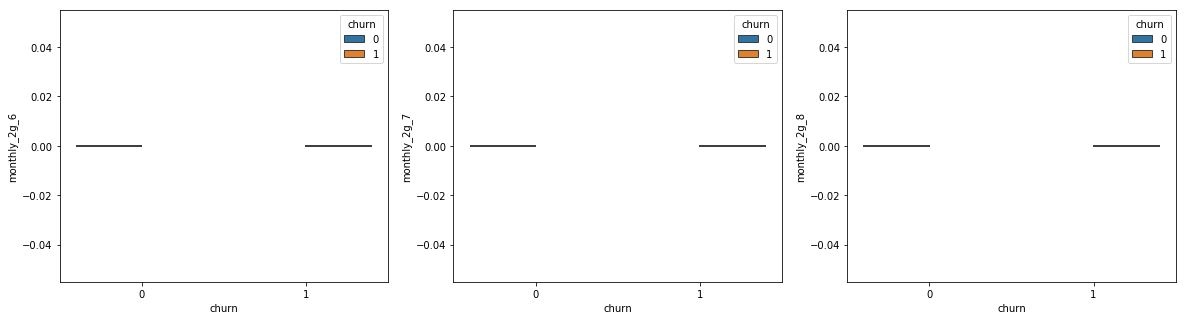

<Figure size 1440x360 with 0 Axes>

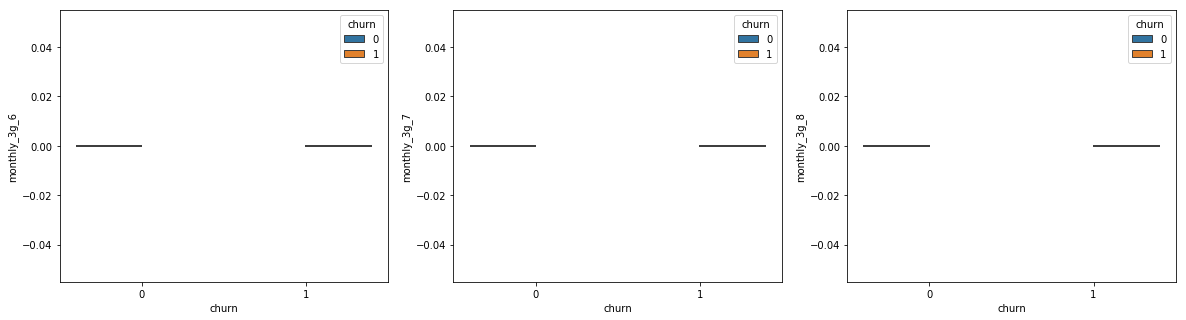

In [47]:
meanAndMedian('monthly_2g')
meanAndMedian('monthly_3g')

## We can clearly see that Mean value decreases for churned case for both 2g and 3g

In [48]:
##Make common column for goodphase for monthly_

monthly_cols = ['monthly_2g','monthly_3g']

for oth in monthly_cols:
    ##combine
    combineGoodPhaseColumn(oth)
    ##drop from df
    df.drop(oth+"_6",axis=1,inplace=True)
    df.drop(oth+"_7",axis=1,inplace=True)

Usage of Internet analysis (Vols)

Column :::vol_2g_mb

Not Churned-----------
Mean for Month 6 ::: 127.83067851959338
Median for Month6 ::: 0.1

Mean for Month 7 ::: 128.22926378809856
Median for Month7 ::: 0.515

Mean for Month 8 ::: 113.24318650217688
Median for Month8 ::: 0.0


Churned---------------
Mean for 6 ::: 111.74869725522325
Median for 6 ::: 0.0

Mean for 7 ::: 89.73632117984411
Median for 7 ::: 0.0

Mean for 8 ::: 23.15274477673085
Median for 8 ::: 0.0

Column :::vol_3g_mb

Not Churned-----------
Mean for Month 6 ::: 349.82529208998625
Median for Month6 ::: 0.0

Mean for Month 7 ::: 383.5483305515226
Median for Month7 ::: 0.0

Mean for Month 8 ::: 374.8849346879516
Median for Month8 ::: 0.0


Churned---------------
Mean for 6 ::: 281.4077222449814
Median for 6 ::: 0.0

Mean for 7 ::: 219.45072920934032
Median for 7 ::: 0.0

Mean for 8 ::: 87.39968455551005
Median for 8 ::: 0.0



<Figure size 1440x360 with 0 Axes>

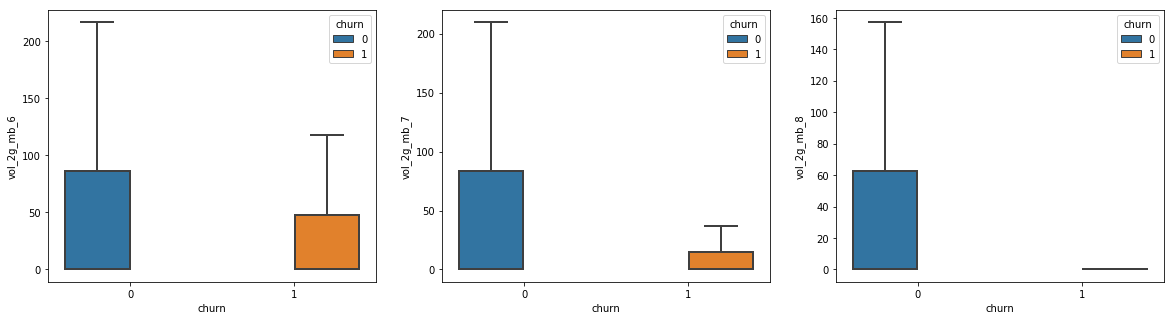

<Figure size 1440x360 with 0 Axes>

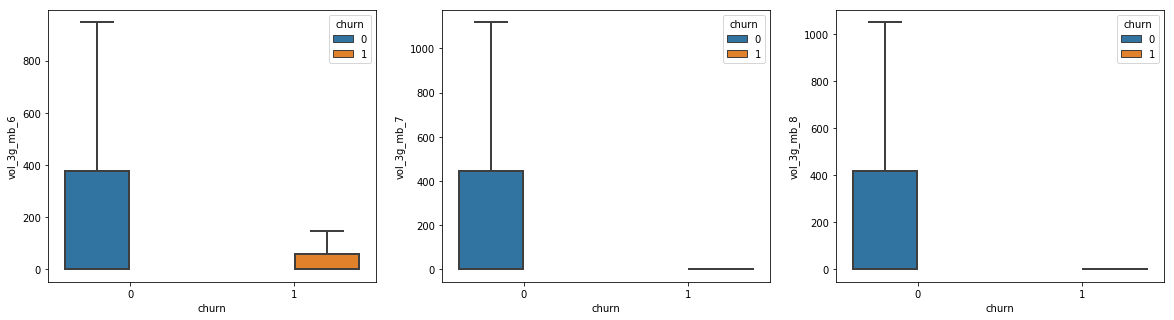

In [49]:
meanAndMedian('vol_2g_mb')
meanAndMedian('vol_3g_mb')

## Usage of MB dropped significantly in 3rd month for churned users

In [50]:
## Create common column for vol for goodphase

vol_cols_good = ['vol_2g_mb','vol_3g_mb']

for oth in vol_cols_good:
    ##combine
    combineGoodPhaseColumn(oth)
    ##drop from df
    df.drop(oth+"_6",axis=1,inplace=True)
    df.drop(oth+"_7",axis=1,inplace=True)

VBC Columns

Column :::vbc_3g

Not Churned-----------
Mean for Month 6 ::: 162.37034252539902
Median for Month6 ::: 0.0

Mean for Month 7 ::: 186.20607837445579
Median for Month7 ::: 0.0

Mean for Month 8 ::: 180.50128011611062
Median for Month8 ::: 0.0


Churned---------------
Mean for 6 ::: 115.09657517410899
Median for 6 ::: 0.0

Mean for 7 ::: 96.07631708316268
Median for 7 ::: 0.0

Mean for 8 ::: 40.85197460057351
Median for 8 ::: 0.0



<Figure size 1440x360 with 0 Axes>

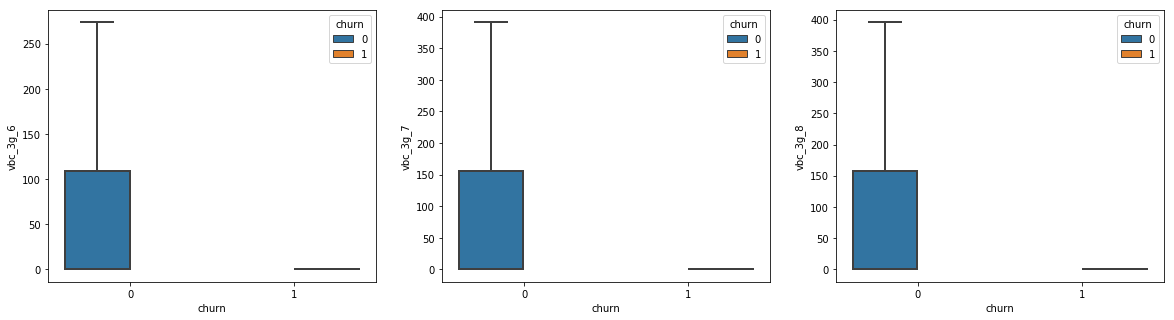

In [51]:
meanAndMedian('vbc_3g')

##Mean values for volume based cost decreased for churned customers

sachet Service

Column :::sachet_2g

Not Churned-----------
Mean for Month 6 ::: 1.0693033381712627
Median for Month6 ::: 0.0

Mean for Month 7 ::: 1.2438316400580551
Median for Month7 ::: 0.0

Mean for Month 8 ::: 1.1243831640058055
Median for Month8 ::: 0.0


Churned---------------
Mean for 6 ::: 1.0294961081523966
Median for 6 ::: 0.0

Mean for 7 ::: 0.8775092175337976
Median for 7 ::: 0.0

Mean for 8 ::: 0.2699713232281852
Median for 8 ::: 0.0

Column :::sachet_3g

Not Churned-----------
Mean for Month 6 ::: 0.2063134978229318
Median for Month6 ::: 0.0

Mean for Month 7 ::: 0.22804789550072568
Median for Month7 ::: 0.0

Mean for Month 8 ::: 0.2145500725689405
Median for Month8 ::: 0.0


Churned---------------
Mean for 6 ::: 0.2441622285948382
Median for 6 ::: 0.0

Mean for 7 ::: 0.22122081114297418
Median for 7 ::: 0.0

Mean for 8 ::: 0.0651372388365424
Median for 8 ::: 0.0



<Figure size 1440x360 with 0 Axes>

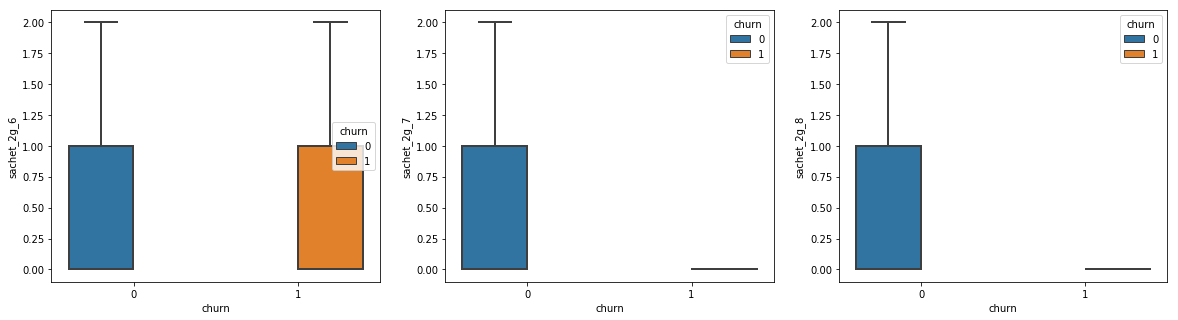

<Figure size 1440x360 with 0 Axes>

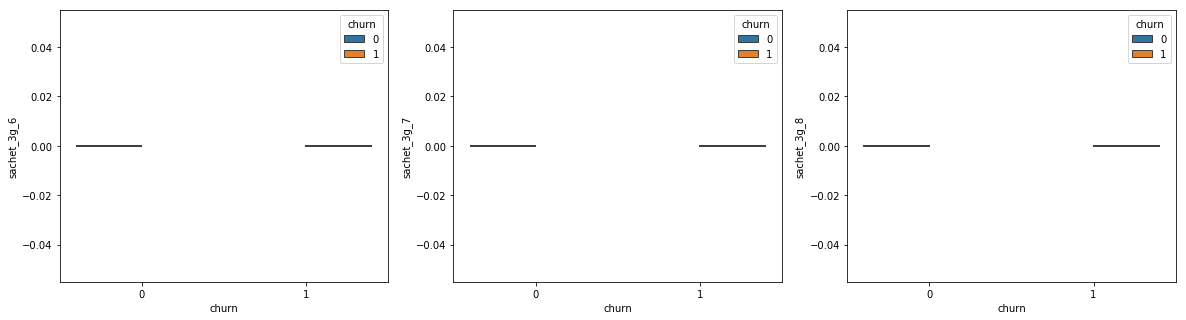

In [52]:
meanAndMedian('sachet_2g')
meanAndMedian('sachet_3g')

## Mean dropped ro churned customers signinficantly for 3g sachets

In [53]:
## Create common column for sachet for goodphase

sachet_cols_good = ['sachet_2g','sachet_3g']

for oth in sachet_cols_good:
    ##combine
    combineGoodPhaseColumn(oth)
    ##drop from df
    df.drop(oth+"_6",axis=1,inplace=True)
    df.drop(oth+"_7",axis=1,inplace=True)

<b>ARPU Column to see Average revenue for two classes</b>

Column :::arpu

Not Churned-----------
Mean for Month 6 ::: 549.2203895500737
Median for Month6 ::: 476.0285

Mean for Month 7 ::: 562.6081909288803
Median for Month7 ::: 482.7645

Mean for Month 8 ::: 532.6357099419475
Median for Month8 ::: 447.09000000000003


Churned---------------
Mean for 6 ::: 663.1582462105691
Median for 6 ::: 556.661

Mean for 7 ::: 540.165968455551
Median for 7 ::: 462.4

Mean for 8 ::: 237.20079270790717
Median for 8 ::: 78.357



<Figure size 1440x360 with 0 Axes>

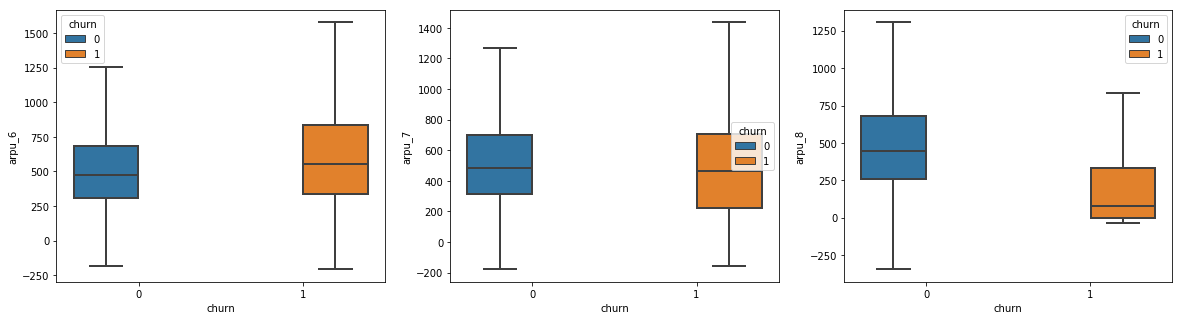

In [54]:
meanAndMedian('arpu')

## We see average revenue decreases significantly in 8th month for the user who is churned

<b>Final Cleaning</b>

In [55]:
## remove columns with more than 40% null data

sparse_columns = df.isnull().sum()/len(df) > 0.4
100*df.loc[:,sparse_columns].isnull().sum()/len(df.loc[:,sparse_columns])

night_pck_user_6        44.148528
night_pck_user_7        43.145228
night_pck_user_8        46.825106
fb_user_6               44.148528
fb_user_7               43.145228
fb_user_8               46.825106
last_rchg_day_data_6    44.148528
last_rchg_day_data_7    43.145228
last_rchg_day_data_8    46.825106
dtype: float64

In [56]:
## We already have analysed internet pack and minutes of usage, so we can drop Night Pack columns
## We also have anaylsed last day recharge and data related columns, so we can drop last_rchg_day_data

df.drop(df.columns[sparse_columns],axis=1,inplace=True)

##Let's replace the remaining Nan Values to 0
df.loc[:,:] = df.loc[:,:].replace(np.NaN,0)

In [57]:
df.shape

#We substantially reduced the number of columns

(30001, 96)

In [58]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,max_rech_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_8,churn,goodphase_last_day_rch_amt,goodphase_total_rech_num,goodphase_total_rech_amt,goodphase_total_rech_amt_data,goodphase_max_rech_amt,goodphase_max_rech_data,goodphase_spl_og_mou,goodphase_isd_og_mou,goodphase_roam_og_mou,goodphase_std_og_t2m_mou,goodphase_std_og_t2t_mou,goodphase_std_og_t2f_mou,goodphase_loc_og_t2m_mou,goodphase_loc_og_t2t_mou,goodphase_loc_og_t2f_mou,goodphase_loc_og_t2c_mou,goodphase_spl_ic_mou,goodphase_isd_ic_mou,goodphase_roam_ic_mou,goodphase_std_ic_t2m_mou,goodphase_std_ic_t2t_mou,goodphase_std_ic_t2f_mou,goodphase_loc_ic_t2m_mou,goodphase_loc_ic_t2t_mou,goodphase_loc_ic_t2f_mou,goodphase_og_others,goodphase_ic_others,last_rchg_day_6,last_rchg_day_7,last_rchg_day_8,goodphase_monthly_2g,goodphase_monthly_3g,goodphase_vol_2g_mb,goodphase_vol_3g_mb,goodphase_sachet_2g,goodphase_sachet_3g
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.16,4.13,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.0,0.00,0.00,2,252,252,252,252.0,5.75,109.61,0,0,1,0,968,30.40,0.00,101.20,252.0,1,252.0,3.5,307.0,252.0,252.0,252.0,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,21.0,16.0,8.0,0.0,1.0,15.725,117.165,0.0,0.0
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,31.64,38.06,40.28,162.28,53.23,0.00,12.01,49.14,16.68,10.01,6.50,0.0,487.53,609.24,350.16,27.31,121.19,39.53,427.88,355.23,188.04,30.39,141.33,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.0,31.59,15.14,7,3638,1580,779,0.0,0.00,0.00,0,0,0,0,802,57.74,19.38,18.74,0.0,1,0.0,5.0,1185.0,0.0,1185.0,0.0,2.25,0.090,18.165,40.825,13.795,13.37,378.005,41.385,58.635,0.0,0.105,8.295,24.86,109.215,24.360,43.215,219.525,45.200,126.810,0.0,15.465,27.0,25.0,26.0,0.0,0.0,0.000,0.000,0.0,0.0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,12.49,50.54,0.00,7.15,22.58,75.69,0.00,0.00,10.23,0.0,508.36,431.66,171.56,0.31,15.48,0.00,81.43,23.83,15.79,0.10,0.65,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.0,0.00,0.00,14,120,30,10,23.0,0.03,11.94,0,3,0,0,315,21.03,910.65,122.16,207.0,0,25.0,20.0,519.0,177.0,122.0,77.0,0.00,0.000,0.000,11.865,124.995,0.00,75.770,257.360,0.000,0.0,0.000,0.000,0.00,13.255,0.290,0.000,35.780,16.840,0.000,0.0,0.000,25.0,31.0,30.0,0.5,0.0,178.000,375.475,0.5,0.0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,23.34,104.81,1.58,0.00,61.79,876.99,0.00,0.00,0.00,0.0,860.34,1028.79,1068.54,19.54,129.16,10.39,125.33,87.68,159.11,0.18,101.74,0.00,81.76,44.21,101.93,207.09,131.89,261.04,0.0,0.00,0.00,27,718,50,50,0.0,0.00,0.00,0,0,0,0,720,0.00,0.00,0.00,0.0,0,25.0,24.0,640.0,0.0,50.0,0.0,0.00,0.000,0.000,737.050,111.935,0.00,89.870,5.320,0.375,0.0,0.000,0.000,0.00,52.960,10.020,0.000,96.430,6.335,3.725,0.0,0.000,30.0,31.0,31.0,0.0,0.0,0.000,0.000,0.0,0.0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,33.58,148.56,0.00,17.71,0.00,39.61,0.00,0.00,17.71,0.0,134.38,140.04,239.48,76.64,146.84,0.71,116.63,174.41,224.21,13.38,43.91,0.00,2.94,14.89,57

<h2>Model</h2>

In [59]:
# Putting feature variable to X
X = df.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = df['churn']

In [60]:
##Scaling the features

from sklearn.preprocessing import StandardScaler

cols = X.columns

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X, columns=cols)

In [61]:
# Splitting 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.7,test_size=0.3,random_state=100)

In [62]:
from sklearn.metrics import confusion_matrix,roc_auc_score,f1_score

##Util function to check sensitivity and precision on test set
def showSensitivity(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    print("AUC Score: ", roc_auc_score(y_test,y_pred)) 
    print("f1 Score: ",f1_score(y_test,y_pred))
    print("")
    print("sensitivity ::: " + str(cm[1,1]/(cm[1,0]+cm[1,1])))
    print("specificity ::: " + str(cm[0,0]/(cm[0,1]+cm[0,0])))
    print("precision   ::: " + str(cm[1,1]/(cm[0,1]+cm[1,1])))
    

In [63]:
#!pip install imblearn
#!pip install xgboost
from imblearn.over_sampling import SMOTE

smote = SMOTE(kind = "regular")

X_smote, y_smote = smote.fit_sample(X_train, y_train)

In [64]:
## Util function to create random undersampled Frame
def underSamplerer(X_train,y_train):

    df_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)],axis=1)
    
    ##As churn cases are only 8%, it's minority class
    df_train_minority  = df_train.loc[df_train.churn == 1,:]
    
    # Frame with non-churn class same as chrun class
    df_train_majority_undersampled = pd.concat([df_train_minority,df_train.loc[df_train.churn == 0,:].sample(df_train_minority.shape[0])])

    return df_train_majority_undersampled

In [65]:
# create majority class undersampled data frame from training data
df_train_undersampled = underSamplerer(X_train,y_train)

## Get y column
X = df_train_undersampled.drop('churn',axis=1)
y = df_train_undersampled.churn

We have sclaed and splitted the Frame. 
We have done the majority class undersampling, and X and y are undersampled training data.

<b>Logistic Regression</b>

In [66]:
from sklearn.linear_model import LogisticRegression

##Taking average of 10 different samples as underSamplerer function is doing random sampling
## and doing Logistic Regression on each sample

sensitivity_avg = 0
specificity_avg = 0
auc_score_avg = 0
precision_avg = 0

for i in range(0,10):
    
    df_train_undersampled = underSamplerer(X_train,y_train)
    
    X_this = df_train_undersampled.drop('churn',axis=1)
    y_this = df_train_undersampled.churn
    
    lsr = LogisticRegression()
    lsr.fit(X_this,y_this)
    y_pred = lsr.predict(X_test)
    
    cp = confusion_matrix(y_test,y_pred)
    
    sensitivity = cp[1,1]/(cp[1,0]+cp[1,1])
    specificity =  cp[0,0]/(cp[0,1]+cp[0,0])
    precision = cp[1,1]/(cp[0,1]+cp[1,1])
    auc_score = roc_auc_score(y_test,y_pred)
    
    ##Add to average
    sensitivity_avg = sensitivity_avg + sensitivity
    specificity_avg = specificity_avg + specificity
    auc_score_avg = auc_score_avg + auc_score
    precision_avg = precision_avg + precision 

C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

In [67]:
print('AUC Score    ::: ',auc_score_avg/10)
print('Precision    ::: ',precision_avg/10) 

print('Sensitivity  ::: ',sensitivity_avg/10)
print('Specificity  ::: ',specificity_avg/10)

AUC Score    :::  0.8309437239930514
Precision    :::  0.3064967112221376
Sensitivity  :::  0.8333333333333334
Specificity  :::  0.8285541146527693


<b>PCA For dimentioanlity reduction</b>

In [68]:
from sklearn.decomposition import IncrementalPCA
pca = IncrementalPCA(n_components=30)

In [69]:
X_train_pca = pca.fit_transform(X) ##Using undersampled frame
X_train_pca.shape

(3382, 30)

In [70]:
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(9001, 30)

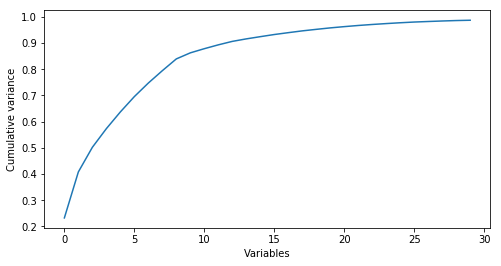

In [71]:
%matplotlib inline
fig = plt.figure(figsize = (8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Variables')
plt.ylabel('Cumulative variance')
plt.show()

## We can see that almost all of the variance has been covered with just 30 variables.
## PCA helped to reduce our variables to 30 columns SCREE PLOT

In [72]:
#Using PCA transformed data in Logistic Regression
PCA_with_LR = LogisticRegression()
PCA_with_LR_model = PCA_with_LR.fit(X_train_pca,y)  ##Using undersampled y frame

In [73]:
# Analysize Logistic regression 
y_pred = PCA_with_LR.predict(X_test_pca)
showSensitivity(y_test,y_pred)

AUC Score:  0.8133452106815335
f1 Score:  0.41353887399463807

sensitivity ::: 0.8226666666666667
specificity ::: 0.8040237546964004
precision   ::: 0.27618621307072516


In [74]:
y_pred_prob = PCA_with_LR.predict_proba(X_test_pca)

## Adjusting probability for LR

##Returns Frame only with churn_probability for y_pred_prob and plots graph for different cut-offs
def returnFrameWithChurnProb():
    
    y_pred_prob_df = pd.DataFrame(y_pred_prob)
    y_pred_prob_df = y_pred_prob_df.iloc[:,[1]]

    y_test_df = pd.DataFrame(y_test)
    y_test_df['c_id'] = y_test_df.index

    y_pred_prob_df.reset_index(drop=True, inplace=True)
    y_test_df.reset_index(drop=True, inplace=True)

    y_churnprob = pd.concat([y_test_df,y_pred_prob_df],axis=1)
    
    y_churnprob= y_churnprob.rename(columns={ 1 : 'prob_churning'})
    
    ##0 to 1 in 0.1 difference
    numbers = [float(x)/10 for x in range(10)]
    
    for i in numbers:
        y_churnprob[i]= y_churnprob.prob_churning.map( lambda x: 1 if x > i else 0)
        
    y_churnprob.head()
    
    cutoff_df = pd.DataFrame( columns = ['probility','sensitivity','specificity','precision','accuracy'])
    
    for i in numbers:
        cm1 = confusion_matrix( y_churnprob.churn, y_churnprob[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        preci = cm1[1,1]/(cm1[0,1]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,sensi,speci,preci,accuracy]
        
    cutoff_df.plot.line(x='probility', y=['sensitivity','specificity','precision','accuracy'])
    
    return y_churnprob

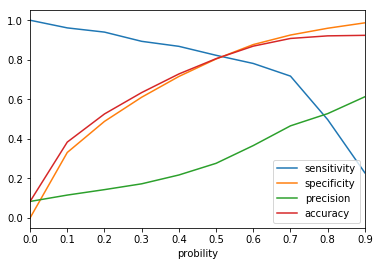

In [75]:
y_churnprob = returnFrameWithChurnProb()

In [76]:
## As we want no potential Churned customer to be left out, we'll keep sensitivity little bit high
cutOf_percent = 0.45

y_churnprob['final_predicted'] = y_churnprob.prob_churning.map( lambda x: 1 if x > cutOf_percent else 0)

In [77]:
showSensitivity(y_churnprob.churn, y_churnprob.final_predicted)

## We see a slight imprement in sensitivity (2%) with better cut-off

AUC Score:  0.8057720680321577
f1 Score:  0.37964891401368644

sensitivity ::: 0.8506666666666667
specificity ::: 0.7608774693976488
precision   ::: 0.2443508234392953


<b>Decision trees and Random Forests</b>

Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve, GridSearchCV

In [79]:
# Decision trees hyperparams
grid_search_best_params_ = {'max_depth': 20,
                            'max_features': 20,
                            'min_samples_leaf': 95,
                            'min_samples_split': 20,
                            'random_state': 1}

# Build Decision tree using parameters obtained.
dtree=DecisionTreeClassifier(**grid_search_best_params_)
dtree.fit(X, y)
showSensitivity(y_test, dtree.predict(X_test))

AUC Score:  0.8061336403668243
f1 Score:  0.40130932896890353

sensitivity ::: 0.8173333333333334
specificity ::: 0.7949339474003151
precision   ::: 0.265943600867679


Random Forests

In [80]:
from sklearn.ensemble import RandomForestClassifier

# build random forest classifier
RF = RandomForestClassifier(**grid_search_best_params_, n_estimators=15)
RF.fit(X, y)
showSensitivity(y_test, RF.predict(X_test))

AUC Score:  0.8397645537914596
f1 Score:  0.519163763066202

sensitivity ::: 0.7946666666666666
specificity ::: 0.8848624409162525
precision   ::: 0.3855109961190168


<b>SVM</b>

In [81]:
# import linear SVM
from sklearn.svm import LinearSVC

# Build linear SVM model
SVM = LinearSVC()
SVM.fit(X_train_pca, y)
showSensitivity(y_test, SVM.predict(X_test_pca))

AUC Score:  0.6597227002787541
f1 Score:  0.23196840573685307

sensitivity ::: 0.744
specificity ::: 0.5754454005575081
precision   ::: 0.13740458015267176


C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<b>Important parameters for Churn</b>

In [82]:
## We'll still work with X and y as they're undersampled testing data

## We now check what all variables are important for churn

## We first check with Logistic Regression with Lasso. 
## Lasso has the ability to automatically reduce to variable coefficients to 0. We use l1 penalty
## This will also helps us with multi-colinearity

In [83]:
import statsmodels.api as sm

In [84]:
## We can find best alpha for sensitivity

## This block takes time
alpharange = [a/10 for a in range(1, 50)]
sensitivites_alpha = []

for alpha in alpharange:
    lassolr = LogisticRegression(C=alpha, penalty='l1', solver='liblinear')
    lassolr.fit(X, y)
    cm = confusion_matrix(y_test, lassolr.predict(X_test))
    sensitivites_alpha.append({"alpha": alpha, "sensitivity": cm[1,1]/(cm[1,0]+cm[1,1])})

pd.DataFrame(sensitivites_alpha).plot.line(x='alpha', y='sensitivity')

In [85]:
## 0.5 is giving good sensitivity
## we'll make a LR model with 0.5 alpha

In [86]:
LR_lasso = LogisticRegression(C=0.5, penalty='l1', solver='liblinear')
LR_lasso.fit(X, y)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
def calculateVIF(x_train):
    frame_vif = pd.DataFrame( columns = ['Variable', 'VIF'])
    
    for i, var in enumerate(x_train.columns):
        rsq = sm.OLS(x_train[var], x_train.drop([var], axis=1)).fit().rsquared
        vif = round( 1 / (1 - rsq + 0.00000000001), 2)
        frame_vif.loc[i] = [var, vif]
        
    return frame_vif.sort_values(by = 'VIF', axis=0, ascending=False, inplace=False)

In [88]:
## Use stats model to check p values and VIFs

In [89]:
X = sm.add_constant(X)
stat_model = sm.Logit(y, X).fit_regularized(method='l1')
print(stat_model.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.37407683550608656
            Iterations: 314
            Function evaluations: 532
            Gradient evaluations: 314
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3382
Model:                          Logit   Df Residuals:                     3287
Method:                           MLE   Df Model:                           94
Date:                Mon, 07 Oct 2019   Pseudo R-squ.:                  0.4603
Time:                        16:21:23   Log-Likelihood:                -1265.1
converged:                       True   LL-Null:                       -2344.2
                                        LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

In [90]:
vif_frame = calculateVIF(X)
vif_frame

,Variable,VIF
24,total_og_mou_8,5.401010e+09
30,loc_ic_mou_8,5.079206e+09
39,total_ic_mou_8,3.538773e+09
81,goodphase_loc_ic_t2m_mou,2.058415e+09
16,std_og_t2t_mou_8,1.883852e+09
17,std_og_t2m_mou_8,1.804401e+09
26,loc_ic_t2m_mou_8,1.301370e+09
28,loc_ic_mou_6,1.231494e+09
36,std_ic_mou_8,1.191567e+09
29,loc_ic_mou_7,1.162478e+09


In [91]:
## Keep variables with low VIF Only to deal with multi-colinearity
high_vif_cols = list(vif_frame[vif_frame['VIF']>=4.060000e+00].Variable)
high_vif_cols.remove('const')
high_vif_cols

['total_og_mou_8',
 'loc_ic_mou_8',
 'total_ic_mou_8',
 'goodphase_loc_ic_t2m_mou',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_mou_6',
 'std_ic_mou_8',
 'loc_ic_mou_7',
 'goodphase_loc_ic_t2t_mou',
 'goodphase_std_ic_t2m_mou',
 'loc_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2t_mou_8',
 'std_ic_mou_6',
 'goodphase_std_ic_t2t_mou',
 'isd_ic_mou_8',
 'std_ic_t2t_mou_8',
 'goodphase_loc_ic_t2f_mou',
 'loc_ic_t2f_mou_8',
 'std_ic_t2f_mou_8',
 'goodphase_std_ic_t2f_mou',
 'isd_og_mou_8',
 'goodphase_std_og_t2m_mou',
 'spl_og_mou_8',
 'goodphase_std_og_t2t_mou',
 'total_og_mou_6',
 'total_og_mou_7',
 'loc_og_t2f_mou_8',
 'ic_others_8',
 'goodphase_loc_og_t2m_mou',
 'std_og_t2f_mou_8',
 'goodphase_loc_og_t2t_mou',
 'og_others_8',
 'total_ic_mou_7',
 'total_ic_mou_6',
 'goodphase_isd_og_mou',
 'goodphase_isd_ic_mou',
 'goodphase_loc_og_t2f_mou',
 'onnet_mou_8',
 'offnet_mou_8',
 'goodphase_spl_og_mou',
 'offnet_mou_6',
 'onn

In [92]:
X = X.drop(high_vif_cols, axis=1)
X_test = X_test.drop(high_vif_cols, axis=1)

In [94]:
## We'll train LR again after dropping cols with high VIF
LR_lasso = LogisticRegression(C=0.5, penalty='l1', solver='liblinear')
LR_lasso.fit(X, y)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
stat_model = sm.Logit(y, X).fit_regularized(method='l1')
print(stat_model.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.46852235420774585
            Iterations: 69
            Function evaluations: 121
            Gradient evaluations: 69
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3382
Model:                          Logit   Df Residuals:                     3358
Method:                           MLE   Df Model:                           23
Date:                Mon, 07 Oct 2019   Pseudo R-squ.:                  0.3241
Time:                        16:22:25   Log-Likelihood:                -1584.5
converged:                       True   LL-Null:                       -2344.2
                                        LLR p-value:                1.786e-307
                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

In [96]:
## remove features with high P value
high_p_cols = ['loc_og_t2c_mou_8','sachet_3g_8','vbc_3g_6','goodphase_spl_ic_mou',
               'last_rchg_day_6','goodphase_sachet_3g','goodphase_loc_og_t2c_mou']

X = X.drop(high_p_cols, axis=1)
X_test = X_test.drop(high_p_cols, axis=1)

In [97]:
## We'll train LR again after dropping cols with high P Value
LR_lasso = LogisticRegression(C=0.5, penalty='l1', solver='liblinear')
LR_lasso.fit(X, y)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
stat_model = sm.Logit(y, X).fit_regularized(method='l1')
print(stat_model.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4692947397966009
            Iterations: 47
            Function evaluations: 90
            Gradient evaluations: 47
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3382
Model:                          Logit   Df Residuals:                     3365
Method:                           MLE   Df Model:                           16
Date:                Mon, 07 Oct 2019   Pseudo R-squ.:                  0.3230
Time:                        16:25:03   Log-Likelihood:                -1587.2
converged:                       True   LL-Null:                       -2344.2
                                        LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

In [99]:
vif_frame = calculateVIF(X)
vif_frame

## All variables have low VIF

,Variable,VIF
0,const,26.06
2,total_rech_num_8,1.98
8,vbc_3g_8,1.92
9,vbc_3g_7,1.89
11,goodphase_total_rech_num,1.78
1,roam_ic_mou_8,1.70
12,goodphase_roam_ic_mou,1.69
15,goodphase_monthly_2g,1.64
16,goodphase_vol_2g_mb,1.58
4,vol_2g_mb_8,1.56


<b>Recommendations using sm.summary</b>

2g variables like <b>goodphase_monthly_2g</b> and <b>monthly_2g_8</b> are strongly co-related 
<br>with churning of customers :: Thus if a customer shows some deviation from using 2g services, we can
<br>provide good discounts and good bandwidth for that user for few months

Recharge count columns like <b>total_rech_num_8</b> and <b>goodphase_total_rech_num</b> shows
<br>good co-relation with churning of customers. Thus if customer starts to reduce the number of recharges
<br>we can provide good plans according to the services s/he chooses, like talktime+3g

Column <b>last_rchg_day_8</b> is co-related to churning. If User's last recharge is BEFORE than
<br>the usual date, we can lure him with small recharge value plans with small validity



Columns related to Roaming like <b>goodphase_roam_ic_mou</b> and <b>roam_ic_mou_8</b> <br>
is seen to be co-related to churning. For these types of customers, good roaming packs can be given
<br> which can be cheap as only roaming is applied to it.

<b>Model Selected</b>

<b>Logistic Regression</b> (without PCA)
<br>Gave us the best <b>sensitivity</b> to precision score. So we'll choose it as our base model.
<br><br>
We choose sensitivity as out evaluation metric as we don't need to miss out any potential churning customer<br><br>
Precision    :::  0.3064967112221376<br>
Sensitivity  :::  0.8333333333333334


